### NIFTY Prediction And Forecasting Using Stacked LSTM

In [1]:
import pandas as pd

In [2]:
df=pd.read_excel('C:\\Users\\Admin\\Desktop\\Assignment_Data_vF.xls')

In [3]:
df.head()

,DATE,Open,High,Low,Close,Adj Close,Volume
0,1,9646.700195,9647.049805,9598.500000,9616.400391,9616.400391,141400.0
1,2,9615.549805,9654.150391,9595.400391,9606.900391,9606.900391,129700.0
2,3,9621.549805,9627.400391,9580.450195,9618.150391,9618.150391,181800.0
3,4,9617.900391,9621.400391,9560.799805,9578.049805,9578.049805,171100.0
4,5,9595.450195,9615.849609,9565.500000,9588.049805,9588.049805,213200.0


In [4]:
df.tail()

,DATE,Open,High,Low,Close,Adj Close,Volume
1162,1163,16847.949219,17148.550781,16843.800781,17092.199219,17092.199219,300100.0
1163,1164,17194.500000,17220.699219,17027.849609,17063.250000,17063.250000,200200.0
1164,1165,16548.900391,16705.250000,16203.250000,16247.950195,16247.950195,458000.0
1165,1166,16515.650391,16748.800781,16478.300781,16658.400391,16658.400391,329800.0
1166,1167,16481.599609,16815.900391,16356.299805,16793.900391,16793.900391,404200.0


In [6]:
 null_columns=df.columns[df.isnull().any()]

In [7]:
print(df[df.isnull().any(axis=1)][null_columns].head())

     Open  High  Low  Close  Adj Close  Volume
139   NaN   NaN  NaN    NaN        NaN     NaN
385   NaN   NaN  NaN    NaN        NaN     NaN
583   NaN   NaN  NaN    NaN        NaN     NaN
847   NaN   NaN  NaN    NaN        NaN     NaN


In [8]:
df.dropna(inplace=True)

In [10]:
df1=df.reset_index()['Close']

In [ ]:
df1

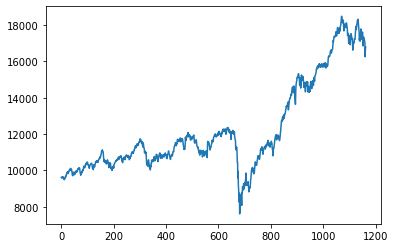

In [11]:
import matplotlib.pyplot as plt
plt.plot(df1)

{'whiskers': [<matplotlib.lines.Line2D at 0x194ef987850>,
 'caps': [<matplotlib.lines.Line2D at 0x194efaafc70>,
 'boxes': [<matplotlib.lines.Line2D at 0x194ef987c70>],
 'medians': [<matplotlib.lines.Line2D at 0x194efe5ec10>],
 'fliers': [<matplotlib.lines.Line2D at 0x194efe720a0>],
 'means': []}

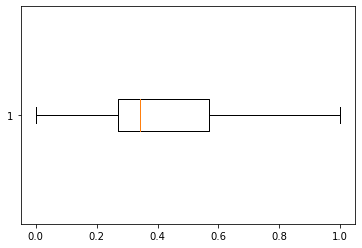

In [28]:
plt.boxplot(df1, vert=False)

In [291]:
### LSTM are sensitive to the scale of the data. so we apply MinMax scaler 

In [12]:
import numpy as np

In [13]:
df1

0        9616.400391
1        9606.900391
2        9618.150391
3        9578.049805
4        9588.049805
            ...     
1158    17092.199219
1159    17063.250000
1160    16247.950195
1161    16658.400391
1162    16793.900391
Name: Close, Length: 1163, dtype: float64

In [14]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [417]:
print(df1)

[[0.17607447]
 [0.17495567]
 [0.16862282]
 ...
 [0.96635143]
 [0.9563033 ]
 [0.96491598]]


In [15]:
##splitting dataset into train and test split
training_size=int(len(df1)*0.75)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [16]:
training_size,test_size

(872, 291)

In [17]:
train_data

array([[0.18461279],
       [0.18373857],
       [0.18477383],
       [0.18108364],
       [0.18200387],
       [0.1883995 ],
       [0.18802682],
       [0.18619552],
       [0.18586427],
       [0.1807984 ],
       [0.17495033],
       [0.17309602],
       [0.17427849],
       [0.17582455],
       [0.18448392],
       [0.18432746],
       [0.18656361],
       [0.1899639 ],
       [0.18915869],
       [0.19884415],
       [0.2002245 ],
       [0.20298979],
       [0.20994681],
       [0.20945443],
       [0.21217838],
       [0.20400672],
       [0.21067374],
       [0.20825355],
       [0.21211395],
       [0.21682098],
       [0.21665068],
       [0.22181325],
       [0.22180399],
       [0.22124727],
       [0.2270079 ],
       [0.23046345],
       [0.22741284],
       [0.22116909],
       [0.22602332],
       [0.22519511],
       [0.21793901],
       [0.21145136],
       [0.20337172],
       [0.19329974],
       [0.20096995],
       [0.21046211],
       [0.21109252],
       [0.204

In [18]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
        return numpy.array(dataX), numpy.array(dataY)

In [19]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [20]:
print(X_train.shape), print(y_train.shape)

(771, 100)
(771,)


(None, None)

In [21]:
print(X_test.shape), print(ytest.shape)

(190, 100)
(190,)


(None, None)

In [22]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [23]:
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [24]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')


In [25]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [26]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
13/13 [==============================] - 13s 384ms/step - loss: 0.0283 - val_loss: 0.1297
Epoch 2/100
13/13 [==============================] - 3s 227ms/step - loss: 0.0049 - val_loss: 0.0361
Epoch 3/100
13/13 [==============================] - 3s 239ms/step - loss: 0.0031 - val_loss: 0.0703
Epoch 4/100
13/13 [==============================] - 3s 224ms/step - loss: 0.0024 - val_loss: 0.0651
Epoch 5/100
13/13 [==============================] - 3s 226ms/step - loss: 0.0022 - val_loss: 0.0380
Epoch 6/100
13/13 [==============================] - 3s 223ms/step - loss: 0.0019 - val_loss: 0.0134
Epoch 7/100
13/13 [==============================] - 3s 209ms/step - loss: 0.0017 - val_loss: 0.0042
Epoch 8/100
13/13 [==============================] - 3s 205ms/step - loss: 0.0017 - val_loss: 0.0013
Epoch 9/100
13/13 [==============================] - 3s 231ms/step - loss: 0.0014 - val_loss: 0.0022
Epoch 10/100
13/13 [==============================] - 3s 211ms/step - loss: 0.0015 - val_l

In [30]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

6/6 [==============================] - 0s 46ms/step


In [31]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [32]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

11049.991561907858

In [33]:
### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

16174.566707776206

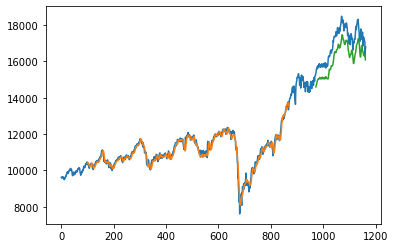

In [34]:
### Plotting 
# shift train predictions for plotting
look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [35]:
len(test_data)

291

In [36]:
x_input=test_data[191:].reshape(1,-1)
x_input.shape


(1, 100)

In [37]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [62]:
temp_input

[0.9344563303998975,
 0.9024091799074642,
 0.9103967035355555,
 0.9022711448012511,
 0.9134243095129765,
 0.8665107062111325,
 0.8690413498250361,
 0.8625306939819933,
 0.8794355011742988,
 0.9010379952966213,
 0.8821776907662991,
 0.8560017053284009,
 0.8803372226834602,
 0.907304753137537,
 0.9116390194914717,
 0.9111283974499137,
 0.8979643776171292,
 0.8939751990287267,
 0.884450776700035,
 0.8869354086118676,
 0.8627147407902772,
 0.8285740578536144,
 0.8429895600015785,
 0.8599770445170541,
 0.8707576222014114,
 0.8644218468073891,
 0.8720137776490998,
 0.8855412180579662,
 0.8837329221854261,
 0.8828448604463283,
 0.8966577171485924,
 0.9216557311431949,
 0.9381786052271605,
 0.9492214137241942,
 0.9327170521724869,
 0.9388641077177392,
 0.956403912287752,
 0.9612304679647184,
 0.9756412970721967,
 0.979823868641878,
 0.9796351487931082,
 0.9844525380187882,
 0.9665034808923308,
 0.9504315574698118,
 0.9337384759773114,
 0.920869038889211,
 0.8777974126182703,
 0.889654592352832

In [38]:
# demonstrate prediction for next 10 days
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[0.7524927]
101
1 day input [0.93680742 0.94645604 0.95112623 0.9553593  0.97098495 0.98725476
 1.         0.99463496 0.98063357 0.9724895  0.96667369 0.96763993
 0.98079928 0.97551243 0.94296382 0.92588431 0.94962635 0.94588089
 0.94038249 0.94844389 0.96240844 0.9601722  0.95768289 0.94446837
 0.96555557 0.96617205 0.95602647 0.94677363 0.93445633 0.90240918
 0.9103967  0.90227114 0.91342431 0.86651071 0.86904135 0.86253069
 0.8794355  0.901038   0.88217769 0.85600171 0.88033722 0.90730475
 0.91163902 0.9111284  0.89796438 0.8939752  0.88445078 0.88693541
 0.86271474 0.82857406 0.84298956 0.85997704 0.87075762 0.86442185
 0.87201378 0.88554122 0.88373292 0.88284486 0.89665772 0.92165573
 0.93817861 0.94922141 0.93271705 0.93886411 0.95640391 0.96123047
 0.9756413  0.97982387 0.97963515 0.98445254 0.96650348 0.95043156
 0.93373848 0.92086904 0.87779741 0.88965459 0.87421317 0.87345847
 0.89535088 0.91716042 0.93585501 0.9156282  0.91158851 0.88373292
 0.888624   0.90675729 0.9198291  

In [39]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [40]:
import matplotlib.pyplot as plt

In [44]:
len(df1)

1163

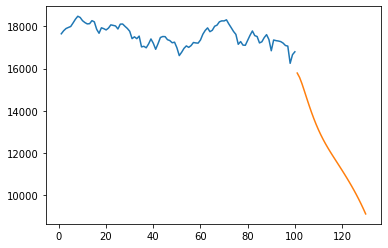

In [46]:
plt.plot(day_new,scaler.inverse_transform(df1[1063:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

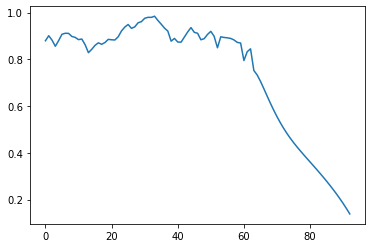

In [47]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[1100:])

In [48]:
df3=scaler.inverse_transform(df3).tolist()

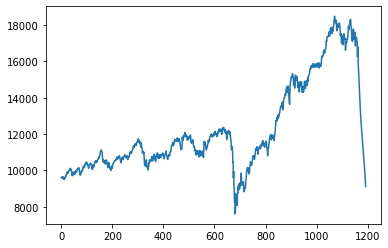

In [49]:
plt.plot(df3)

In [51]:
output= pd.read_excel('C:\\Users\\Admin\\Desktop\\Assignment_Data_vF.xls', sheet_name="Output_File_To_Predict")

In [57]:
a=scaler.inverse_transform(lst_output)

In [59]:
output['NIFTY_PREDICTION (data to fill)']=a

In [60]:
output

,DATE,NIFTY_PREDICTION (data to fill)
0,1168,15787.438541
1,1169,15579.028201
2,1170,15284.619870
3,1171,14949.074068
4,1172,14603.449869
5,1173,14265.026283
6,1174,13942.489772
7,1175,13639.964316
8,1176,13359.069844
9,1177,13099.811538


In [61]:
output.to_csv("C:\\Users\\Admin\\Downloads\\NIFTY_PREDICTION.csv")